# Scatterplot Matrices & Heatmap

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix  
import seaborn as sns
import altair as alt

In [2]:
#Switch to Jupyter Notebook mode of matplotlib (pandas is using matplotlib for the scatterplot matrix)
%matplotlib inline  

sns.set(style="ticks") # use ticks on plot axes

# Starting with altair v4, enabling a notebook renderer is no longer necessary: alt.renderers.enable('notebook') 
alt.__version__

'4.1.0'

## Dataset  

In [3]:
# Load the pokemon dataset
df_data = pd.read_csv('./pokemon.csv')
# More infomation about the dataset: https://www.kaggle.com/rounakbanik/pokemon

In [4]:
# Inspect the dataset 
# See https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df_data.dtypes # No semicolon to see the output in the notebook

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [5]:
# Take a glimpse into the data
df_data.head() # No semicolon to see the output in the notebook

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Hint: Pandas offers [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function to filter out missing data.

## Student Information

Name: **Greif Niklas**

Student ID: **k11941574**

## Task: Scatterplot Matrix
### Simple Scatterplot Matrix
Select more than two attributes that are suitable and create a scatterplot matrix (e.g., with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) or [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)).

array([[<AxesSubplot:xlabel='sp_attack', ylabel='sp_attack'>,
        <AxesSubplot:xlabel='sp_defense', ylabel='sp_attack'>],
       [<AxesSubplot:xlabel='sp_attack', ylabel='sp_defense'>,
        <AxesSubplot:xlabel='sp_defense', ylabel='sp_defense'>]],
      dtype=object)

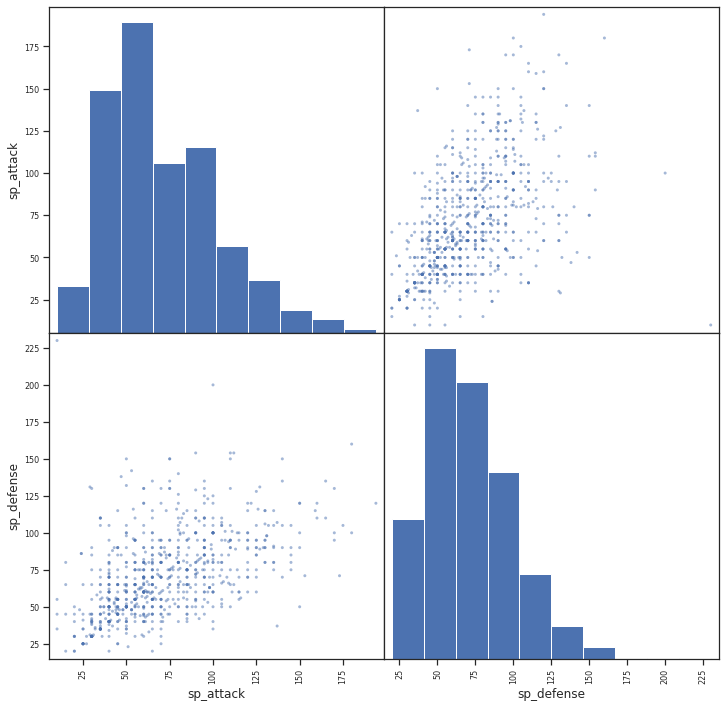

In [6]:
df_scatter = df_data.loc[0:800,['sp_attack', 'sp_defense']]
pd.plotting.scatter_matrix(df_scatter, figsize=(12,12))

### Colored Scatterplot Matrix
Select a categorical attribute and encode its values with color in the scatterplot matrix (e.g. with [altair](https://altair-viz.github.io/gallery/scatter_matrix.html) again or [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)).

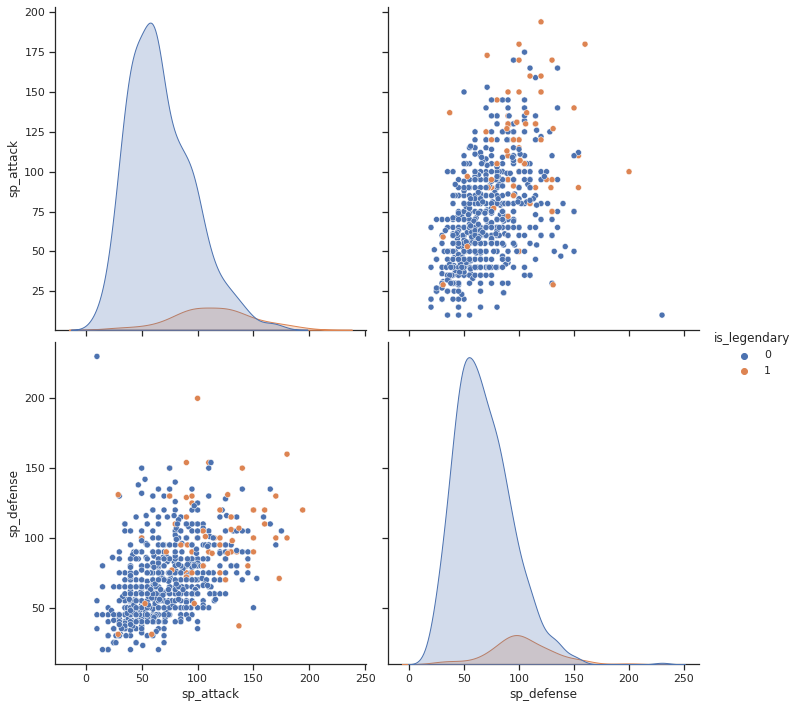

In [7]:
# Plot the selected attributes again and color code the points by position
df_colored_scatter = df_data.loc[0:800,['is_legendary', 'sp_attack', 'sp_defense']]
sns.pairplot(df_colored_scatter, hue='is_legendary', height=5)

### Interpretation

I chose the coloumn "is_legendary" as color-encoding because others attributes consist of much to many category to traceable interpret the plot.

We can see from this plot that legendary pokemons are typically better in terms of attack and defense points than the other pokemons.
We can see that there is one non-legendary pokemon that has more defense points than any other (legendary) pokemon.
Second and third place when talking about defense points goes to two legendary pokemons that have 10 to 20 times better attack points than the non-legendary pokemon with overkill defense at first place. 
The top three pokemons in terms of attack-points are legendary pokemons.

## Task: Heat Map
Select suitable attributes and visualise the data in a heatmap, e.g. with [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) or [altair](https://altair-viz.github.io/gallery/simple_heatmap.html).

<AxesSubplot:>

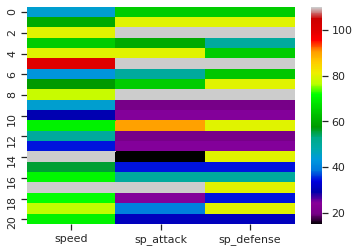

In [8]:
df_heatmap = df_data.loc[0:20, ['speed', 'sp_attack', 'sp_defense']]
sns.heatmap(df_heatmap, cmap='nipy_spectral', vmax=110) #, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

### Interpretation

The heatmap shows the attibutes speed, sp_attack and sp_defence of the first 20 pokemons of the csv-file.
As attributes I chose those, that are about in the same interval, such that differences are obvious when looking at the heatmap.
I further ceiled the attribute-values at 110 to make the colormap even more diverse in it's apearence, because there are a few outliers above 110.
-> Caution: The colors are now no longer representing the real differences for attribute-values above 110. Therefore I chose a colormap, that shows very high values as gray.

The colors represent the values of a pokemon for a given attribute as the colorbar on the left indicates.

Here I give one example to make things clearer:
We can see that pokemon at position 14 (left axes) is very fast (probably above 110 points (real value: 145)), bad at attacking (below 20 points) and above average at defense (around 80 points).

## Submission

Please add your student information (name,student ID) and download this notebook as HTML (File > Export Notebook As... > Export Notebook to HTML) and submit it.